# Identify Fraud from Enron Dataset

#### December 13 2017

### John Ngo

In [1]:
# read in dataset and explore
# lets import all the required libraries to support our analysis


In [2]:
#!/usr/bin/python

# Import libraries

import sys
import pickle
import numpy as np
import pandas as pd

%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

sys.path.append("../tools/")

# Import data formating functions from other files
# features_format in the tools directory

from feature_format import featureFormat, targetFeatureSplit

# in the final_project directory, tester file

from tester import dump_classifier_and_data

Populating the interactive namespace from numpy and matplotlib


/Users/johnngo/anaconda/envs/py2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
    with open("final_project_dataset.pkl", "r") as data_file:
         enronData = pickle.load(data_file)

In [4]:
print enronData

{'METTS MARK': {'salary': 365788, 'to_messages': 807, 'deferral_payments': 'NaN', 'total_payments': 1061827, 'exercised_stock_options': 'NaN', 'bonus': 600000, 'restricted_stock': 585062, 'shared_receipt_with_poi': 702, 'restricted_stock_deferred': 'NaN', 'total_stock_value': 585062, 'expenses': 94299, 'loan_advances': 'NaN', 'from_messages': 29, 'other': 1740, 'from_this_person_to_poi': 1, 'poi': False, 'director_fees': 'NaN', 'deferred_income': 'NaN', 'long_term_incentive': 'NaN', 'email_address': 'mark.metts@enron.com', 'from_poi_to_this_person': 38}, 'BAXTER JOHN C': {'salary': 267102, 'to_messages': 'NaN', 'deferral_payments': 1295738, 'total_payments': 5634343, 'exercised_stock_options': 6680544, 'bonus': 1200000, 'restricted_stock': 3942714, 'shared_receipt_with_poi': 'NaN', 'restricted_stock_deferred': 'NaN', 'total_stock_value': 10623258, 'expenses': 11200, 'loan_advances': 'NaN', 'from_messages': 'NaN', 'other': 2660303, 'from_this_person_to_poi': 'NaN', 'poi': False, 'direct

In [5]:
# display the length of the unique keys in the dataset

print len(enronData)


# display the list of the individual keys

print enronData.keys()

146
['METTS MARK', 'BAXTER JOHN C', 'ELLIOTT STEVEN', 'CORDES WILLIAM R', 'HANNON KEVIN P', 'MORDAUNT KRISTINA M', 'MEYER ROCKFORD G', 'MCMAHON JEFFREY', 'HORTON STANLEY C', 'PIPER GREGORY F', 'HUMPHREY GENE E', 'UMANOFF ADAM S', 'BLACHMAN JEREMY M', 'SUNDE MARTIN', 'GIBBS DANA R', 'LOWRY CHARLES P', 'COLWELL WESLEY', 'MULLER MARK S', 'JACKSON CHARLENE R', 'WESTFAHL RICHARD K', 'WALTERS GARETH W', 'WALLS JR ROBERT H', 'KITCHEN LOUISE', 'CHAN RONNIE', 'BELFER ROBERT', 'SHANKMAN JEFFREY A', 'WODRASKA JOHN', 'BERGSIEKER RICHARD P', 'URQUHART JOHN A', 'BIBI PHILIPPE A', 'RIEKER PAULA H', 'WHALEY DAVID A', 'BECK SALLY W', 'HAUG DAVID L', 'ECHOLS JOHN B', 'MENDELSOHN JOHN', 'HICKERSON GARY J', 'CLINE KENNETH W', 'LEWIS RICHARD', 'HAYES ROBERT E', 'MCCARTY DANNY J', 'KOPPER MICHAEL J', 'LEFF DANIEL P', 'LAVORATO JOHN J', 'BERBERIAN DAVID', 'DETMERING TIMOTHY J', 'WAKEHAM JOHN', 'POWERS WILLIAM', 'GOLD JOSEPH', 'BANNANTINE JAMES M', 'DUNCAN JOHN H', 'SHAPIRO RICHARD S', 'SHERRIFF JOHN R', 'SHE

In [6]:
# Select one of the unique keys and drill down and find the features associated with the unique keys

print len(enronData["LAY KENNETH L"])
print enronData["LAY KENNETH L"]

21
{'salary': 1072321, 'to_messages': 4273, 'deferral_payments': 202911, 'total_payments': 103559793, 'exercised_stock_options': 34348384, 'bonus': 7000000, 'restricted_stock': 14761694, 'shared_receipt_with_poi': 2411, 'restricted_stock_deferred': 'NaN', 'total_stock_value': 49110078, 'expenses': 99832, 'loan_advances': 81525000, 'from_messages': 36, 'other': 10359729, 'from_this_person_to_poi': 16, 'poi': True, 'director_fees': 'NaN', 'deferred_income': -300000, 'long_term_incentive': 3600000, 'email_address': 'kenneth.lay@enron.com', 'from_poi_to_this_person': 123}


In [7]:
# Looking at corresponding values of the features inside of the unique keys

enronData.values()

[{'bonus': 600000,
  'deferral_payments': 'NaN',
  'deferred_income': 'NaN',
  'director_fees': 'NaN',
  'email_address': 'mark.metts@enron.com',
  'exercised_stock_options': 'NaN',
  'expenses': 94299,
  'from_messages': 29,
  'from_poi_to_this_person': 38,
  'from_this_person_to_poi': 1,
  'loan_advances': 'NaN',
  'long_term_incentive': 'NaN',
  'other': 1740,
  'poi': False,
  'restricted_stock': 585062,
  'restricted_stock_deferred': 'NaN',
  'salary': 365788,
  'shared_receipt_with_poi': 702,
  'to_messages': 807,
  'total_payments': 1061827,
  'total_stock_value': 585062},
 {'bonus': 1200000,
  'deferral_payments': 1295738,
  'deferred_income': -1386055,
  'director_fees': 'NaN',
  'email_address': 'NaN',
  'exercised_stock_options': 6680544,
  'expenses': 11200,
  'from_messages': 'NaN',
  'from_poi_to_this_person': 'NaN',
  'from_this_person_to_poi': 'NaN',
  'loan_advances': 'NaN',
  'long_term_incentive': 1586055,
  'other': 2660303,
  'poi': False,
  'restricted_stock': 394

In [8]:
# convert dictionary to dataframe

df = pd.DataFrame.from_dict(enronData, orient = 'index')
print df

                                 salary to_messages deferral_payments  \
ALLEN PHILLIP K                  201955        2902           2869717   
BADUM JAMES P                       NaN         NaN            178980   
BANNANTINE JAMES M                  477         566               NaN   
BAXTER JOHN C                    267102         NaN           1295738   
BAY FRANKLIN R                   239671         NaN            260455   
BAZELIDES PHILIP J                80818         NaN            684694   
BECK SALLY W                     231330        7315               NaN   
BELDEN TIMOTHY N                 213999        7991           2144013   
BELFER ROBERT                       NaN         NaN           -102500   
BERBERIAN DAVID                  216582         NaN               NaN   
BERGSIEKER RICHARD P             187922         383               NaN   
BHATNAGAR SANJAY                    NaN         523               NaN   
BIBI PHILIPPE A                  213625        1607

In [9]:
# tallying up the values associated with the features

df['bonus'].value_counts()

NaN         64
600000       6
1000000      6
700000       5
750000       4
400000       4
800000       4
325000       3
200000       3
850000       3
300000       3
1500000      2
2000000      2
350000       2
3000000      2
900000       2
500000       2
1100000      2
250000       2
100000       2
1200000      2
3100000      1
650000       1
8000000      1
5600000      1
97343619     1
788750       1
1150000      1
1700000      1
70000        1
450000       1
1350000      1
425000       1
1300000      1
1250000      1
7000000      1
2600000      1
2500000      1
1750000      1
4175000      1
509870       1
5249999      1
Name: bonus, dtype: int64

In [10]:
# finding out what type our features data belong to

df.dtypes

salary                       object
to_messages                  object
deferral_payments            object
total_payments               object
exercised_stock_options      object
bonus                        object
restricted_stock             object
shared_receipt_with_poi      object
restricted_stock_deferred    object
total_stock_value            object
expenses                     object
loan_advances                object
from_messages                object
other                        object
from_this_person_to_poi      object
poi                            bool
director_fees                object
deferred_income              object
long_term_incentive          object
email_address                object
from_poi_to_this_person      object
dtype: object

In [11]:
# looking at the list of features from the dataframe perspective

df.describe()

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
count,146,146,146,146,146,146,146,146,146,146,...,146,146,146,146,146,146,146,146,146,146
unique,95,87,40,126,102,42,98,84,19,125,...,5,65,93,42,2,18,45,53,112,58
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
freq,51,60,107,21,44,64,36,60,128,20,...,142,60,53,60,128,129,97,80,35,60


In [12]:
# checking out features list

features = list(df.keys())
print features
print len(features)

['salary', 'to_messages', 'deferral_payments', 'total_payments', 'exercised_stock_options', 'bonus', 'restricted_stock', 'shared_receipt_with_poi', 'restricted_stock_deferred', 'total_stock_value', 'expenses', 'loan_advances', 'from_messages', 'other', 'from_this_person_to_poi', 'poi', 'director_fees', 'deferred_income', 'long_term_incentive', 'email_address', 'from_poi_to_this_person']
21


In [13]:
df.head()

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
ALLEN PHILLIP K,201955,2902,2869717,4484442,1729541,4175000,126027,1407,-126027,1729541,...,NaN,2195,152,65,False,NaN,-3081055,304805,phillip.allen@enron.com,47
BADUM JAMES P,NaN,NaN,178980,182466,257817,NaN,NaN,NaN,NaN,257817,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,477,566,NaN,916197,4046157,NaN,1757552,465,-560222,5243487,...,NaN,29,864523,0,False,NaN,-5104,NaN,james.bannantine@enron.com,39
BAXTER JOHN C,267102,NaN,1295738,5634343,6680544,1200000,3942714,NaN,NaN,10623258,...,NaN,NaN,2660303,NaN,False,NaN,-1386055,1586055,NaN,NaN
BAY FRANKLIN R,239671,NaN,260455,827696,NaN,400000,145796,NaN,-82782,63014,...,NaN,NaN,69,NaN,False,NaN,-201641,NaN,frank.bay@enron.com,NaN


In [14]:

# Determine the split between POIs / non POIs

print "Persons of interest Count:"
print df['poi'].value_counts()

print '\n'
print "Persons of interest Fraction:"
print df['poi'].value_counts(1)

Persons of interest Count:
False    128
True      18
Name: poi, dtype: int64


Persons of interest Fraction:
False    0.876712
True     0.123288
Name: poi, dtype: float64


# Outlier Analysis

# Outlier Analysis

It's important to check for outliers in the dataset. We will plot the total payment vs total stock value as they are the total of the financial features.




In [15]:
print df.total_payments

ALLEN PHILLIP K                    4484442
BADUM JAMES P                       182466
BANNANTINE JAMES M                  916197
BAXTER JOHN C                      5634343
BAY FRANKLIN R                      827696
BAZELIDES PHILIP J                  860136
BECK SALLY W                        969068
BELDEN TIMOTHY N                   5501630
BELFER ROBERT                       102500
BERBERIAN DAVID                     228474
BERGSIEKER RICHARD P                618850
BHATNAGAR SANJAY                  15456290
BIBI PHILIPPE A                    2047593
BLACHMAN JEREMY M                  2014835
BLAKE JR. NORMAN P                    1279
BOWEN JR RAYMOND M                 2669589
BROWN MICHAEL                        49288
BUCHANAN HAROLD G                  1054637
BUTTS ROBERT H                     1271582
BUY RICHARD B                      2355702
CALGER CHRISTOPHER F               1639297
CARTER REBECCA C                    477557
CAUSEY RICHARD A                   1868758
CHAN RONNIE

In [16]:
df.total_stock_value

ALLEN PHILLIP K                    1729541
BADUM JAMES P                       257817
BANNANTINE JAMES M                 5243487
BAXTER JOHN C                     10623258
BAY FRANKLIN R                       63014
BAZELIDES PHILIP J                 1599641
BECK SALLY W                        126027
BELDEN TIMOTHY N                   1110705
BELFER ROBERT                       -44093
BERBERIAN DAVID                    2493616
BERGSIEKER RICHARD P                659249
BHATNAGAR SANJAY                       NaN
BIBI PHILIPPE A                    1843816
BLACHMAN JEREMY M                   954354
BLAKE JR. NORMAN P                     NaN
BOWEN JR RAYMOND M                  252055
BROWN MICHAEL                          NaN
BUCHANAN HAROLD G                  1014505
BUTTS ROBERT H                      417619
BUY RICHARD B                      3444470
CALGER CHRISTOPHER F                126027
CARTER REBECCA C                       NaN
CAUSEY RICHARD A                   2502063
CHAN RONNIE

In [17]:
# Converting our 'NaN' into 0 to convert to integer data

df.replace('NaN', 0, inplace = True)

In [18]:
df.dtypes

salary                        int64
to_messages                   int64
deferral_payments             int64
total_payments                int64
exercised_stock_options       int64
bonus                         int64
restricted_stock              int64
shared_receipt_with_poi       int64
restricted_stock_deferred     int64
total_stock_value             int64
expenses                      int64
loan_advances                 int64
from_messages                 int64
other                         int64
from_this_person_to_poi       int64
poi                            bool
director_fees                 int64
deferred_income               int64
long_term_incentive           int64
email_address                object
from_poi_to_this_person       int64
dtype: object

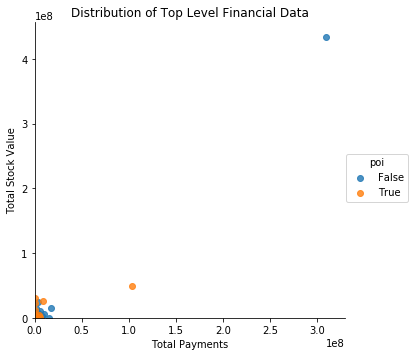

In [19]:
# Running a plot visualization, to determine our outliers


g = sns.lmplot('total_payments', 'total_stock_value', 
           data=df, 
           fit_reg=False,
           hue ='poi')

plt.title('Distribution of Top Level Financial Data')
plt.xlabel('Total Payments')
plt.ylabel('Total Stock Value')

g.set(ylim=(0, None))
g.set(xlim=(0, None))

# https://seaborn.pydata.org/generated/seaborn.lmplot.html

Based on our graph, we notice some points on the graph that seems suspect. Lets zoom in.

In [20]:
# Adding a parameter to zoom in our outliers

df[df['total_payments']>10000000]

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
BHATNAGAR SANJAY,0,523,0,15456290,2604490,0,-2604490,463,15456290,0,...,0,29,137864,1,False,137864,0,0,sanjay.bhatnagar@enron.com,0
FREVERT MARK A,1060932,3275,6426990,17252530,10433518,2000000,4188667,2979,0,14622185,...,2000000,21,7427621,6,False,0,-3367011,1617011,mark.frevert@enron.com,242
LAVORATO JOHN J,339288,7259,0,10425757,4158995,8000000,1008149,3962,0,5167144,...,0,2585,1552,411,False,0,0,2035380,john.lavorato@enron.com,528
LAY KENNETH L,1072321,4273,202911,103559793,34348384,7000000,14761694,2411,0,49110078,...,81525000,36,10359729,16,True,0,-300000,3600000,kenneth.lay@enron.com,123
TOTAL,26704229,0,32083396,309886585,311764000,97343619,130322299,0,-7576788,434509511,...,83925000,0,42667589,0,False,1398517,-27992891,48521928,0,0


In [21]:
df['total_payments']> df[df['total_payments']>1e8]

,ALLEN PHILLIP K,BADUM JAMES P,BANNANTINE JAMES M,BAXTER JOHN C,BAY FRANKLIN R,BAZELIDES PHILIP J,BECK SALLY W,BELDEN TIMOTHY N,BELFER ROBERT,BERBERIAN DAVID,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
LAY KENNETH L,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
TOTAL,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [22]:
# Get indexes
df.index.values

array(['ALLEN PHILLIP K', 'BADUM JAMES P', 'BANNANTINE JAMES M',
       'BAXTER JOHN C', 'BAY FRANKLIN R', 'BAZELIDES PHILIP J',
       'BECK SALLY W', 'BELDEN TIMOTHY N', 'BELFER ROBERT',
       'BERBERIAN DAVID', 'BERGSIEKER RICHARD P', 'BHATNAGAR SANJAY',
       'BIBI PHILIPPE A', 'BLACHMAN JEREMY M', 'BLAKE JR. NORMAN P',
       'BOWEN JR RAYMOND M', 'BROWN MICHAEL', 'BUCHANAN HAROLD G',
       'BUTTS ROBERT H', 'BUY RICHARD B', 'CALGER CHRISTOPHER F',
       'CARTER REBECCA C', 'CAUSEY RICHARD A', 'CHAN RONNIE',
       'CHRISTODOULOU DIOMEDES', 'CLINE KENNETH W', 'COLWELL WESLEY',
       'CORDES WILLIAM R', 'COX DAVID', 'CUMBERLAND MICHAEL S',
       'DEFFNER JOSEPH M', 'DELAINEY DAVID W', 'DERRICK JR. JAMES V',
       'DETMERING TIMOTHY J', 'DIETRICH JANET R', 'DIMICHELE RICHARD G',
       'DODSON KEITH', 'DONAHUE JR JEFFREY M', 'DUNCAN JOHN H',
       'DURAN WILLIAM D', 'ECHOLS JOHN B', 'ELLIOTT STEVEN',
       'FALLON JAMES B', 'FASTOW ANDREW S', 'FITZGERALD JAY L',
       'FOW

https://en.wikipedia.org/wiki/Kenneth_Lay

Because Kenneth Lay was a central figure in the Enron scandal, it's important that we include it in our dataset. The 'Total' can be removed, because it's the sum of the values for the various individual in the dataset. As we inspected the PDF, we notice a row "The Travel Agency in the Park" in the following dataset which does not appear to be an Enron insider. The 'Total' and 'The Travel Agency in the Park' will be removed and replotted. 

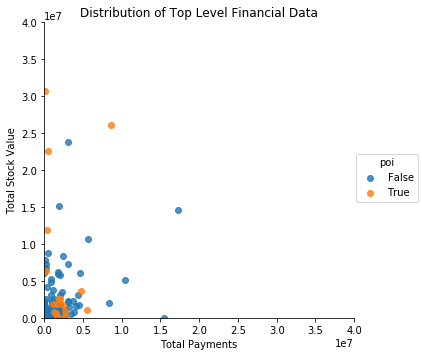

In [23]:
# Remove outliers and replot

df = df.drop(['TOTAL', 'THE TRAVEL AGENCY IN THE PARK'])

g = sns.lmplot('total_payments', 'total_stock_value', 
           data=df, 
           fit_reg=False,
           hue ='poi')

plt.title('Distribution of Top Level Financial Data')
plt.xlabel('Total Payments')
plt.ylabel('Total Stock Value')

g.set(xlim=(0, 0.4e8))
g.set(ylim=(0, 0.4e8))

# New Features

A couple of newly added feature relating to email habits may increase the chance of predicting POIs.

 * (from_this_person_to_poi/from_messages) - measures the number of times the person sent emails that went to POI.  
 
 * (from_poi_person_to_person/to_messages) - measures the number of times the person receive messages from POI.

In [24]:
# Replace zeroes with NaN

df.replace(0, np.nan, inplace = True)

df['f_to_poi'] = df['from_this_person_to_poi']/df['from_messages']

df['f_from_poi'] = df['from_poi_to_this_person']/df['to_messages']



In [25]:
print df['f_to_poi'].describe()
print df['f_from_poi'].describe()

count    66.000000
mean      0.239830
std       0.210767
min       0.009302
25%       0.054855
50%       0.218968
75%       0.341400
max       1.000000
Name: f_to_poi, dtype: float64
count    74.000000
mean      0.044119
std       0.040481
min       0.001068
25%       0.016370
50%       0.029580
75%       0.059118
max       0.217341
Name: f_from_poi, dtype: float64


Text(31.19,0.5,u'f_from_poi')

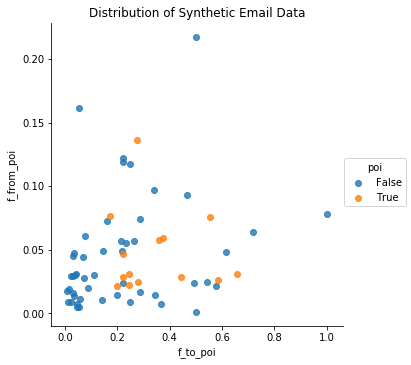

In [26]:
# Email Features

g = sns.lmplot('f_to_poi', 'f_from_poi', 
           data=df, 
           fit_reg=False, 
           hue='poi')
           
plt.title('Distribution of Synthetic Email Data')
plt.xlabel('f_to_poi')
plt.ylabel('f_from_poi')

In regards to email habits, the POIs appear to have all clustered within a 'from_poi' range from 0.00 to 0.15 and a 'to_poi' band from 0.20 to 0.60. This clustering might mean that this feature will prove useful for identifying POIs.

In [27]:
df.describe()

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,director_fees,deferred_income,long_term_incentive,from_poi_to_this_person,f_to_poi,f_from_poi
count,9.400000e+01,86.000000,3.800000e+01,1.230000e+02,1.010000e+02,8.100000e+01,1.090000e+02,86.000000,1.700000e+01,1.250000e+02,...,3.000000e+00,86.000000,9.100000e+01,66.000000,16.000000,4.800000e+01,6.500000e+01,74.000000,66.000000,74.000000
mean,2.840875e+05,2073.860465,8.416025e+05,2.641806e+06,2.959559e+06,1.201773e+06,1.147424e+06,1176.465116,6.218928e+05,3.352073e+06,...,2.797500e+07,608.790698,4.664105e+05,53.727273,89822.875000,-5.810498e+05,7.464912e+05,75.418919,0.239830,0.044119
std,1.771311e+05,2582.700981,1.289323e+06,9.524694e+06,5.499450e+06,1.441679e+06,2.249770e+06,1178.317641,3.845528e+06,6.532883e+06,...,4.638256e+07,1841.033949,1.397376e+06,111.420002,41112.700735,9.420764e+05,8.629174e+05,89.467681,0.210767,0.040481
min,4.770000e+02,57.000000,-1.025000e+05,1.480000e+02,3.285000e+03,7.000000e+04,-2.604490e+06,2.000000,-1.787380e+06,-4.409300e+04,...,4.000000e+05,12.000000,2.000000e+00,1.000000,3285.000000,-3.504386e+06,6.922300e+04,1.000000,0.009302,0.001068
25%,2.118020e+05,541.250000,7.964450e+04,3.969340e+05,5.067650e+05,4.250000e+05,2.520550e+05,249.750000,-3.298250e+05,4.941360e+05,...,1.200000e+06,22.750000,1.203000e+03,6.000000,83674.500000,-6.112092e+05,2.750000e+05,20.500000,0.054855,0.016370
50%,2.587410e+05,1211.000000,2.210635e+05,1.101393e+06,1.297049e+06,7.500000e+05,4.410960e+05,740.500000,-1.402640e+05,1.095040e+06,...,2.000000e+06,41.000000,5.158700e+04,15.000000,106164.500000,-1.519270e+05,4.221580e+05,40.500000,0.218968,0.029580
75%,3.086065e+05,2634.750000,8.672112e+05,2.087530e+06,2.542813e+06,1.200000e+06,9.850320e+05,1888.250000,-7.241900e+04,2.606763e+06,...,4.176250e+07,145.500000,3.319830e+05,37.750000,112815.000000,-3.792600e+04,8.318090e+05,93.500000,0.341400,0.059118
max,1.111258e+06,15149.000000,6.426990e+06,1.035598e+08,3.434838e+07,8.000000e+06,1.476169e+07,5521.000000,1.545629e+07,4.911008e+07,...,8.152500e+07,14368.000000,1.035973e+07,609.000000,137864.000000,-8.330000e+02,5.145434e+06,528.000000,1.000000,0.217341


In [28]:
df.replace(np.nan, 'NaN', inplace = True)

# create a dictionary from the dataframe
df_dict = df.to_dict('index')

# Confirm that updated dictionary contains new features

print df_dict["SKILLING JEFFREY K"]

{'to_messages': 3627.0, 'deferral_payments': 'NaN', 'expenses': 29336.0, 'poi': True, 'long_term_incentive': 1920000.0, 'email_address': 'jeff.skilling@enron.com', 'from_poi_to_this_person': 88.0, 'deferred_income': 'NaN', 'f_from_poi': 0.0242624758753791, 'restricted_stock_deferred': 'NaN', 'shared_receipt_with_poi': 2042.0, 'loan_advances': 'NaN', 'from_messages': 108.0, 'other': 22122.0, 'director_fees': 'NaN', 'bonus': 5600000.0, 'total_stock_value': 26093672.0, 'f_to_poi': 0.2777777777777778, 'from_this_person_to_poi': 30.0, 'restricted_stock': 6843672.0, 'salary': 1111258.0, 'total_payments': 8682716.0, 'exercised_stock_options': 19250000.0}


In [29]:
# Store modified dictionary to my_dataset for easy export below.

my_dataset = df_dict

# Full features list, for informational / copying purposes

'''
features_list = ['poi','salary', 'deferral_payments', 'total_payments', 
'loan_advances', 'bonus', 'restricted_stock_deferred', 'deferred_income', 
'total_stock_value', 'expenses', 'exercised_stock_options', 'other','email_address',
'long_term_incentive', 'restricted_stock', 'director_fees','to_messages',
'from_poi_to_this_person', 'from_messages','from_this_person_to_poi', 
'shared_receipt_with_poi','f_from_poi','f_to_poi']
'''

# Used features lists
# CRITICAL that 'poi' is listed 1st in 'features_list' (see feature_format.py)

# features_list lets me test the results including the four new features
# excluded features: email_address

features_list = ['poi','salary', 'deferral_payments', 'total_payments', 
'loan_advances', 'bonus', 'restricted_stock_deferred', 'deferred_income', 
'total_stock_value', 'expenses', 'exercised_stock_options', 'other',
'long_term_incentive', 'restricted_stock', 'director_fees','to_messages',
'from_poi_to_this_person', 'from_messages','from_this_person_to_poi', 
'shared_receipt_with_poi','f_from_poi','f_to_poi']

# features_list_minus_new lets me test the results if the new features are excluded
# excluded features: email_address,'to_poi_ratio','from_poi_ratio','TP_TSV_ratio','deferred_total_ratio'

features_list_minus_new = ['poi','salary', 'deferral_payments', 'total_payments', 
'loan_advances', 'bonus', 'restricted_stock_deferred', 'deferred_income', 
'total_stock_value', 'expenses', 'exercised_stock_options', 'other',
'long_term_incentive', 'restricted_stock', 'director_fees','to_messages',
'from_poi_to_this_person', 'from_messages','from_this_person_to_poi', 
'shared_receipt_with_poi']

# Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)

# Uncomment the line below to test performance minus new features:
# data = featureFormat(my_dataset, features_list_minus_new, sort_keys = True)


labels, features = targetFeatureSplit(data)

# Count number of people in data set
# 'targetFeatureSplit' nets out those dropped due to all zeroes

print "Net data set size (# people):",len(labels)

Net data set size (# people): 143


Getting the labels and features into a suitable form. 

# Machine Learning Algorithm - First Run

Our dataset has been explored, cleaned and transform into a suitable form for sklearn algorithm. The first step will be to test a variety of classifiers to get a feel for whether any stand out as candidates worth further investigation. After this step, the final classifier(s) will be optimized for the task at hand.

For both of these steps, I will be measuring the time it takes to train/test/fit/predict a given algorithm, since the development and run time is one of the factors that should be taken into account when choosing a model.

In [30]:
# Replace np.nan with NaN (for compatibility with feature_format.py)

df.replace(np.nan, 'NaN', inplace = True)

In [31]:
# Import the desired classifiers, splitters, metrics etc.

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report

from time import time

# All classifiers are named clf for compatibility with tester.py
# Comment out ('#') all classifiers other than the desired one

# clf = GaussianNB()
clf = DecisionTreeClassifier(random_state=42)
# clf = SVC(random_state=42)
# clf = KNeighborsClassifier()
# clf = RandomForestClassifier(random_state=42)
# clf = GradientBoostingClassifier(random_state=42)
# clf = AdaBoostClassifier(random_state=42)

# Split data into training and testing sets, using 30% split

t0 = time()

features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)
    
clf.fit(features_train,labels_train)
labels_pred = clf.predict(features_test)

print classification_report(labels_test, labels_pred)

print "total train/test/prediction time:", round(time()-t0, 3), "s"

             precision    recall  f1-score   support

        0.0       0.90      0.95      0.92        38
        1.0       0.33      0.20      0.25         5

avg / total       0.83      0.86      0.84        43

total train/test/prediction time: 0.003 s


| Algorithm |  New Feature Included?  | Precision     | Recall | F1 Score | Runtime (ms)       
| :- | :- | :- | :- |:- | :-
|GaussianNB (GNB)                | yes |  0.50 | 0.40 | 0.44 | 4
| DecisionTreeClassifier (DTC)   | yes | 0.33| 0.20 |0.25 | 4
|SupportVectorClassifier (SVC)   | yes | 0.00 | 0.00 | 0.00  | 8
|KNeighborsClassifier (KNN)	     | yes | 0.00 |0.00| 0.00  | 12
| RandomForestClassifier (RFC)   | yes | 0.00| 0.00 | 0.00 | 53
|GradientBoostingClassifier (GBC)| yes | 0.25 |0.20| 0.22  | 93
| AdaBoostClassifier (ABC)       | yes | 0.25| 0.20 | 0.22 | 43
|GaussianNB (GNB)                | No | 0.50 | 0.40  | 0.44  | 4
| DecisionTreeClassifier (DTC)   | No | 0.00 | 0.00 | 0.00  | 5
|SupportVectorClassifier (SVC)   | No | 0.00 | 0.00  | 0.00  | 4
| KNeighborsClassifier (KNN)	  | No | 0.00  | 0.00 | 0.00 | 5
|RandomForestClassifier (RFC)	     | No | 0.50 |0.20  | 0.29 | 49
| GradientBoostingClassifier (GBC)  | No | 0.33  | 0.20 | 0.25 | 88
|AdaBoostClassifier (ABC)           | No | 0.17 |0.20  | 0.18 | 155

The following key observations were made when comparing the effect of excluding or including the new features:
* Including the new features improved the first pass results for the following algorithms:
    * DTC
    * ABC
* Including the new features had no impact on the first pass results for the following algorithms:
    * SVC
    * KNN
* Including the new features worsened the first pass results for the following algorithms:
    * RFC

So for the most part, the new features either improve or have no impact on the first pass results for the algorithms of interest. In addition, the one algorithm that remained the same by including the new features (GNB) has very few tuning parameters and therefore is not nearly as interesting to me for the validation, tuning and optimization portion of the project. Based on these results, I will proceed with a features_list that includes the two new features.

The following key observations were made from these initial results, under the scenario where the new features were included:
    * GNB was the only algorithm to achieve the desired 0.3 threshold on precision and recall with this basic model. It also has a very short runtime compared to other promising candidates and hence will definitely proceed to the next stage. DTC was our next best algorithm that came close to our desired 0.3 threshold.

    * SVC and KNN failed to correctly identify any POIs, with precision and recall values of 0.00. This does not mean that they might not work well if optimized later, but since I plan on moving forward with a small subset of algorithms (possibly only 1), they will not be selected, given other algorithms showed promise.

    * The runtimes on RFC, GBC and ABC were orders of magnitude longer than the more simple algorithms. This is not a problem at this stage, but could become an issue as model complexity expands during the cross validation stage of the project.

In [32]:
# Dump classifer and data for checking via tester.py

dump_classifier_and_data(clf, my_dataset, features_list)

After running the DTC classifier along with the selected features and dataset (clf, features_list, my_dataset), the following results were achieved via tester.py:
    * Precision = 0.31603
    * Recall = 0.31050
Therefore, a standard DTC model achieves the project requirements. Based on these results, I will proceed with the optimization of the DTC model to see if I can improve on the results.

# Pick and Tune an Algorithm

In this section, we will optimize the classifier to see if we can improve the precision and recall results.Sklearn GridSearchCV is a way of systematically working through multiple combinations of parameter tunes, cross-validating as it goes to determine which tune gives the best performance. We can use it to tune the Decision tree classifier. I decided to select the following parameters for tuning:

criterion, max_depth, max_features,max_leaf_nodes, min_samples_split



#### Decision Tree

In [63]:
from sklearn.grid_search import GridSearchCV

t0 = time()


param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [3, 4, 5, None],
              'max_features': [2, 3, 4],
              'max_leaf_nodes':np.arange(7,11),
              'min_samples_split': [2, 4, 6, 8],
         
              }

clf = GridSearchCV(DecisionTreeClassifier(), param_grid)
clf = clf.fit(features_train, labels_train)
print "done in %0.3fs" % (time() - t0)
print "Best estimator found by grid search:"
print clf.best_estimator_

done in 2.404s
Best estimator found by grid search:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=3, max_leaf_nodes=9, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

t0 = time()
clf = DecisionTreeClassifier()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)

from sklearn.metrics import accuracy_score
acc = accuracy_score(labels_test, pred)
print 'Accuracy: ' + str(acc)
print 'Precision: ', precision_score(labels_test, pred)
print 'Recall: ', recall_score(labels_test, pred)
print 'F1 score:', f1_score(labels_test, pred)
print 'Decision Tree algorithm run time: ', round(time()-t0, 3), 's'

Accuracy: 0.860465116279
Precision:  0.333333333333
Recall:  0.2
F1 score: 0.25
Decision Tree algorithm run time:  0.007 s


# Conclusion

The work in this notebook provided the steps for generating an Enron POI machine learning classifer. The data was analysed and cleaned and a new synthetic features were added. The data was then formatted for machine learning algorithms. A number of algorithms were tested and ultimately a decision tree classifier (DTC) was optimized using grid search cross validation. We were unable to achieve the desirable outcome after tuning our parameters, however, our desirable outcome was achieved without fine tuning our decision tree paramenters.